# Outliers Analysis

### Import libraries

In [26]:
# Data manipulation packages
import pandas as pd
import numpy as np
import re
# Data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns 
import folium

# Tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

### Import data

In [27]:
# import for mac
# Import all the monthly csv dataset
nov_20 = pd.read_csv(r"/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202011-divvy-tripdata.csv")
dec_20 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202012-divvy-tripdata.csv')
jan_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202101-divvy-tripdata.csv')
feb_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202102-divvy-tripdata.csv')
march_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202103-divvy-tripdata.csv')
april_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202104-divvy-tripdata.csv')
may_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202105-divvy-tripdata.csv')
jun_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202106-divvy-tripdata.csv')
july_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202107-divvy-tripdata.csv')
aug_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202108-divvy-tripdata.csv')
sept_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202109-divvy-tripdata.csv')
oct_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202110-divvy-tripdata.csv')
nov_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202111-divvy-tripdata.csv')


# nov_20 = pd.read_csv(r"./202011-divvy-tripdata.csv")
# dec_20 = pd.read_csv(r'./202012-divvy-tripdata.csv')
# jan_21 = pd.read_csv(r'./202101-divvy-tripdata.csv')
# feb_21 = pd.read_csv(r'./202102-divvy-tripdata.csv')
# march_21 = pd.read_csv(r'./202103-divvy-tripdata.csv')
# april_21 = pd.read_csv(r'./202104-divvy-tripdata.csv')
# may_21 = pd.read_csv(r'./202105-divvy-tripdata.csv')
# jun_21 = pd.read_csv(r'./202106-divvy-tripdata.csv')
# july_21 = pd.read_csv(r'./202107-divvy-tripdata.csv')
# aug_21 = pd.read_csv(r'./202108-divvy-tripdata.csv')
# sept_21 = pd.read_csv(r'./202109-divvy-tripdata.csv')
# oct_21 = pd.read_csv(r'./202110-divvy-tripdata.csv')
# nov_21 = pd.read_csv(r'./202111-divvy-tripdata.csv')

# Join all months into a single dataframe
months = [nov_20, dec_20, jan_21, feb_21, march_21, april_21, may_21, jun_21, july_21, aug_21, sept_21, oct_21, nov_21]
df_months = pd.concat(months)

# Get basic information
df_months.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5738812 entries, 0 to 359977
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 613.0+ MB


In [28]:
# Check for duplicates
df_months.duplicated().sum()

0

## Data Processing
- Convert the data type
- Calculate ride duration (end - start time)

In [29]:
# Funtion to preprocess datetime string, adding seconds if missing
def preprocess_datetime(dt_str):
    if pd.isna(dt_str):
        return np.nan
    if len(dt_str) == 16:  # Format is missing seconds (YYYY-MM-DD HH:MM)
        return dt_str + ':00'
    # Add leading zero to single-digit hours
    if len(dt_str) == 15 and re.match(r'\d{4}-\d{2}-\d{2} \d:\d{2}', dt_str):
        return dt_str[:11] + '0' + dt_str[11:] + ':00'
    
    # Add leading zero to single-digit hours with missing seconds
    if len(dt_str) == 14 and re.match(r'\d{4}-\d{2}-\d{2} \d:\d{2}', dt_str):
        return dt_str[:11] + '0' + dt_str[11:] + ':00'
    return dt_str

# Apply the preprocessing function to both columns
df_months['started_at'] = df_months['started_at'].apply(preprocess_datetime)
df_months['ended_at'] = df_months['ended_at'].apply(preprocess_datetime)

# Convert to date time
df_months['started_at'] = pd.to_datetime(df_months['started_at'],format='%Y-%m-%d %H:%M:%S')
df_months['ended_at'] = pd.to_datetime(df_months['ended_at'],format='%Y-%m-%d %H:%M:%S')

df_months.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual


## Data Extraction

In [30]:
# start day of week [Mon, Tue]
df_months['day'] = df_months['started_at'].dt.day_name()

# start time, from this we can determine if Morn, Afternoon, Night 
df_months['start_time'] = df_months['started_at'].dt.strftime('%H:%M:%S')
df_months['end_time'] = df_months['ended_at'].dt.strftime('%H:%M:%S') # Time when rides ended 

# Creata a column to assign period based on the time

def day_period(time_str):
    hour = int(time_str.split(':')[0])
    if 0 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

# Apply the function to the 'start_time' column
df_months['time_of_day'] = df_months['start_time'].apply(day_period)

# month
df_months['month'] = df_months['started_at'].dt.strftime("%b-%y")

# Find the ride duration is seconds
df_months['ride_duration'] = (df_months['ended_at']-df_months['started_at']).dt.total_seconds()

# Get basic descriptive stats on the duration
df_months['ride_duration'].describe()

count    5.738812e+06
mean     1.208008e+03
std      1.752267e+04
min     -1.742998e+06
25%      4.090000e+02
50%      7.250000e+02
75%      1.318000e+03
max      3.356649e+06
Name: ride_duration, dtype: float64

In [31]:
# Check for missing values
df_months.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    675769
start_station_id      675876
end_station_name      725658
end_station_id        725735
start_lat                  0
start_lng                  0
end_lat                 5022
end_lng                 5022
member_casual              0
day                        0
start_time                 0
end_time                   0
time_of_day                0
month                      0
ride_duration              0
dtype: int64

In [32]:
df_months.shape

(5738812, 19)

#### Show distribution

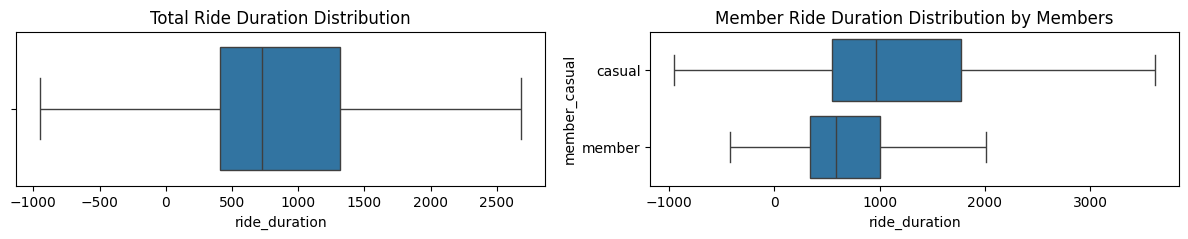

Interquartile range: 909.0
Lower Bound: -954.5
Upper Bound: 2681.5
Mean: 1208.0079748212697


In [33]:
# Get outliers
fig, axes = plt.subplots(1, 2, figsize = (15,2))

# Plot 1
sns.boxplot(ax=axes[0], x=df_months['ride_duration'], showfliers = False)
axes[0].set_title('Total Ride Duration Distribution')

# Plot 2
sns.boxplot(ax=axes[1], x = df_months['ride_duration'], y = df_months['member_casual'], showfliers = False)
axes[1].set_title('Member Ride Duration Distribution by Members')
plt.show()

p25 = df_months['ride_duration'].quantile(0.25) # 25th percentile
p50 = df_months['ride_duration'].quantile(0.5) # 50th percentile
p75 = df_months['ride_duration'].quantile(0.75) # 75th percentile

# Interquartile range
iqr = p75 - p25
print(f'Interquartile range: {iqr}')

# Lower Limit
lower_bound  = p25 - 1.5 * iqr
print(f'Lower Bound: {lower_bound}')

# Upper Limit
upper_bound = p75 + 1.5 * iqr
print(f'Upper Bound: {upper_bound}')

# Mean
print(f'Mean: {df_months['ride_duration'].mean()}')

#### Store missing value into a dataframe for analysis

In [34]:
# Get and store missing values into a dataframe for analysis
df_missing = df_months[df_months.isnull().any(axis=1)].reset_index(drop=True)

# Remove negative ride durations
df_missing = df_missing[df_missing['ride_duration'] >= 0].reset_index(drop=True)

# 
df_missing['missing'] = True

print(f'We have {df_missing.shape[0]} rows with missing values.')
print(f'Which is {100-((df_months.shape[0] - df_missing.shape[0])/df_months.shape[0])*100:.2f} % of our dataset.')

We have 990075 rows with missing values.
Which is 17.25 % of our dataset.


In [51]:
# Drop negative ride duration AND keep outliers
df_outliers = df_months[(df_months['ride_duration'] >= 0) & (df_months['ride_duration'] > upper_bound)].reset_index(drop=True)

df_outliers['missing'] = False

df_outliers.shape

(423944, 20)

In [52]:
# Join missing and outliers
# df = pd.concat([df_missing, df_outliers], axis=0)

df = df_outliers

# Check for duplicates
print(f'Number of duplicates {df.duplicated().sum()}.')

# Drop duplicates
df.drop_duplicates(keep='last',inplace=True)

df.head()

Number of duplicates 0.


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day,start_time,end_time,time_of_day,month,ride_duration,missing
0,7259585D8276D338,electric_bike,2020-11-14 15:55:17,2020-11-14 16:44:38,Wabash Ave & 16th St,72.0,Lake Shore Dr & Monroe St,76.0,41.860289,-87.625806,41.880985,-87.616773,casual,Saturday,15:55:17,16:44:38,Afternoon,Nov-20,2961.0,False
1,7AC10E240991F19E,electric_bike,2020-11-07 13:30:27,2020-11-07 14:33:42,Wells St & Polk St,175.0,Southport Ave & Clybourn Ave,307.0,41.872491,-87.633822,41.920736,-87.663705,casual,Saturday,13:30:27,14:33:42,Afternoon,Nov-20,3795.0,False
2,DC6EC1271155826C,electric_bike,2020-11-07 10:55:37,2020-11-07 12:42:15,Dusable Harbor,6.0,Cannon Dr & Fullerton Ave,34.0,41.887082,-87.612795,41.926672,-87.634506,casual,Saturday,10:55:37,12:42:15,Morning,Nov-20,6398.0,False
3,17C6D1FE18CEA581,electric_bike,2020-11-07 09:40:26,2020-11-07 11:03:04,Greenwood Ave & 47th St,252.0,Greenwood Ave & 47th St,252.0,41.809790,-87.599117,41.809889,-87.599166,casual,Saturday,09:40:26,11:03:04,Morning,Nov-20,4958.0,False
4,C1CB78CDAD52AE3A,electric_bike,2020-11-07 12:39:52,2020-11-07 14:19:20,Halsted St & Dickens Ave,225.0,NaN,NaN,41.920032,-87.648887,41.920000,-87.650000,casual,Saturday,12:39:52,14:19:20,Afternoon,Nov-20,5968.0,False


## Investigate null rows

### User-Based Analysis
- What is the distribution of outliers across different members?

In [53]:
# Total number of rides
print(f'Total number of bad rides: {df.count()['ride_id']}')

# members and casual
print(f'Members: {df['member_casual'].value_counts()['member']}') 
print(f'Casual: {df['member_casual'].value_counts()['casual']}') 

Total number of bad rides: 423944
Members: 61873
Casual: 362071


In [54]:
# Ride duration comparison
df.groupby('member_casual').agg({'ride_duration':'mean'}).reset_index()

,member_casual,ride_duration
0,casual,7780.603484
1,member,5765.607923


#### Summary
- Distribution:
Casual riders account for the majority of the bad rides (85.4%).
Member riders account for the remaining 14.6% of the bad rides.
- Average Ride Duration:
Casual riders have a higher average ride duration compared to member riders.

This summary provides a clear view of how outliers are distributed among casual and member riders, highlighting both the quantity of bad rides and the average ride durations for each group.

### Bike Type-Based Analysis
- Which bike models or types have higher rates of anomalies or outliers?
- Do certain bike types experience more mechanical issues leading to outlier rides?
- How does the distribution of ride durations vary across different bike types?


#### Which bike types have higher rates of outliers or bad data?

rideable_type
classic_bike     204274
docked_bike      110820
electric_bike    108850
Name: count, dtype: int64


Text(0, 0.5, 'Number of Rides')

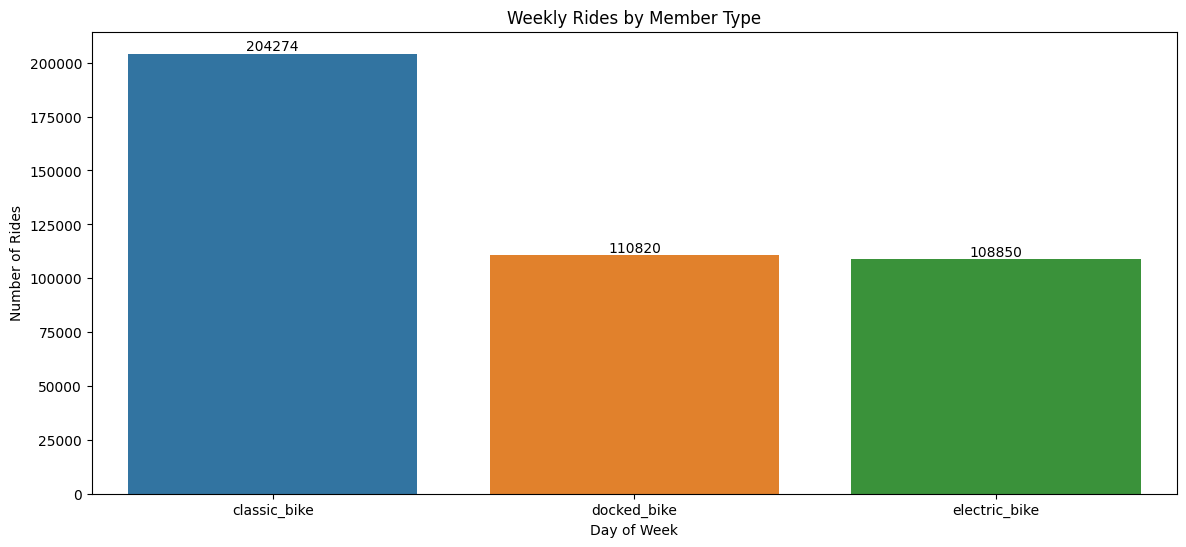

In [55]:
print(df['rideable_type'].value_counts())

df_bp = df.groupby(['rideable_type']).count()['ride_id'].reset_index()

# Plot
plt.figure(figsize = (14,6))
sns.barplot(data = df_bp, x = 'rideable_type', y = 'ride_id', hue = 'rideable_type')

# Plot a bargraph
def addlabels(x,y,labels):
    for i in range(len(x)):
        plt.text(i,y[i],labels[i], ha='center', va='bottom')

addlabels(df_bp.index, df_bp['ride_id'], df_bp['ride_id'])

plt.title('Weekly Rides by Member Type')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')


#### Summary 
Classic bikes have the highest number of outliers, with 204,274 rides. In comparison, docked bikes and electric bikes have fewer outliers, with 110,820 and 108,850 rides, respectively.

This indicates that classic bikes might have a higher rate of issues or anomalies in the dataset compared to docked and electric bikes. This could be due to several factors, such as:

- Usage Patterns: Classic bikes might be used more frequently or in different conditions that lead to more data anomalies.
- Bike Maintenance: Classic bikes might require more maintenance or might be more prone to issues that could reflect as outliers in the data.

#### How does the distribution of ride durations vary across different bike types?

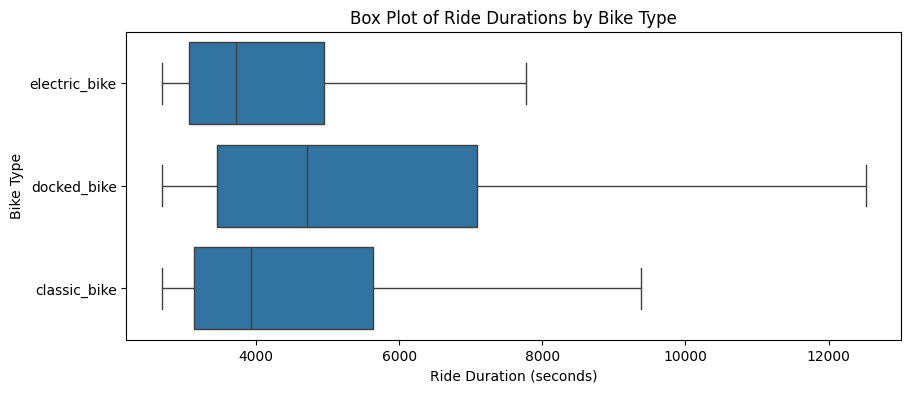

               ride_duration
rideable_type               
classic_bike     6577.925664
docked_bike     11994.537123
electric_bike    4602.044575


In [56]:
import seaborn as sns

# Plot box plots
plt.figure(figsize=(10, 4))
sns.boxplot(y='rideable_type', x='ride_duration', data=df, showfliers = False)
plt.ylabel('Bike Type')
plt.xlabel('Ride Duration (seconds)')
plt.title('Box Plot of Ride Durations by Bike Type')
plt.show()

print(df.groupby('rideable_type').agg({'ride_duration':'mean'}))

### Summary

- Insight: Docked bikes have the highest mean ride duration, suggesting that they are associated with longer trips compared to the other bike types.
- Possible Reasons: This could indicate that docked bikes are used for longer journeys, possibly for commuting or travel between locations that are not easily reachable by shorter rides. It might also be indicative of users keeping docked bikes for extended periods.

This analysis suggests that electric bikes tend to be used for shorter, more consistent trips, while classic and docked bikes are associated with longer and more varied ride durations, with classic bikes showing the greatest variability and number of long-duration rides.

## Ride-Based Analysis

#### How do the ride durations of outliers compare to typical rides?

Outlier Ride Duration by Members

In [57]:
df.groupby('member_casual').agg({'ride_duration':'mean'}).reset_index()

,member_casual,ride_duration
0,casual,7780.603484
1,member,5765.607923


Ride Duration for typical rides

In [58]:
# Get clean rides
df_clean = df_months
# rtemove outliers and negatives
df_clean = df_clean[(df_clean['ride_duration'] >= 0) & (df_clean['ride_duration'] < upper_bound)]
# drop na values
df_clean = df_clean.dropna(axis=0).reset_index(drop=True)

print(f'Number of clean data: {df_clean.shape[0]}.')

df_clean.groupby('member_casual').agg({'ride_duration':'mean'}).reset_index()

Number of clean data: 4382260.


,member_casual,ride_duration
0,casual,995.878002
1,member,729.937950


#### Summary
- Casual Riders: The discrepancy suggests that while the average casual ride duration is much lower, there are a few exceptionally long rides. These outliers could be due to special circumstances or rare usage patterns.
- Members: Similarly, members also have a small number of exceptionally long rides, though their typical ride duration is shorter than that of casual riders. The long outlier rides for members may indicate different usage patterns or behaviors not captured by the typical ride duration.

In summary, outliers have ride durations that are several times longer than the typical ride durations for both casual riders and members. This information can be useful for understanding rare but significant usage patterns

#### Do outliers tend to occur more on certain days of the week or at certain times of the day?


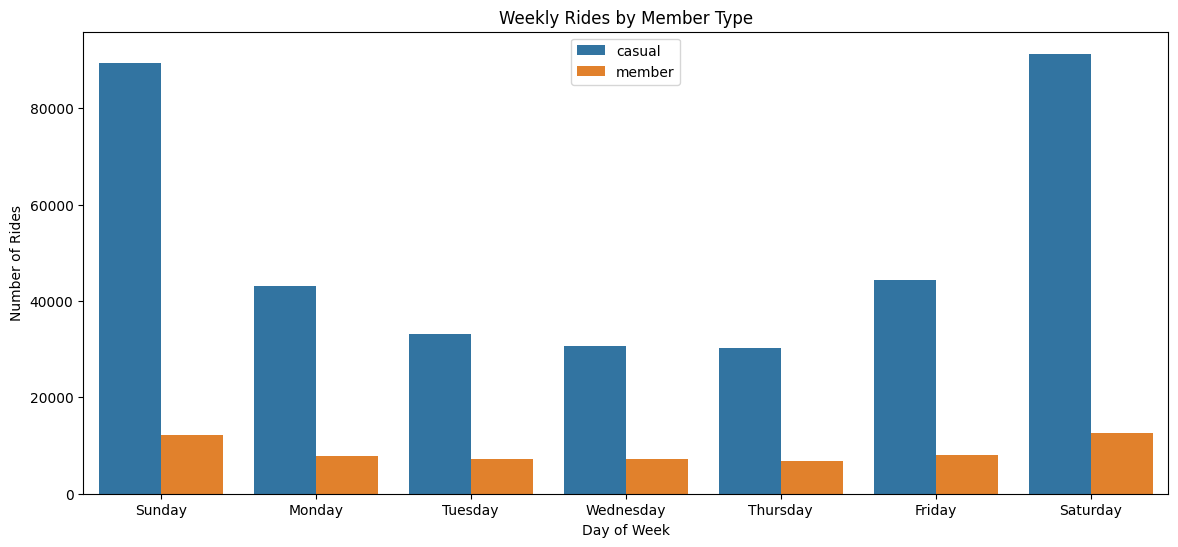

In [59]:
# What day of the week do outliers occcur more frequently
df_od = df.groupby(['member_casual','day']).count()['ride_id'].reset_index()

week_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

# Plot
plt.figure(figsize = (14,6))
sns.barplot(data = df_od, x = 'day', y = 'ride_id', hue = 'member_casual', order= week_order)

plt.title('Weekly Rides by Member Type')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')

# Show legend
plt.legend()

#### Summary
Outliers tend to occur more frequently on weekends for both casual and member riders:

- Casual Riders: The highest number of outliers is observed on Saturday, followed by Sunday and Friday. The lowest number of outliers occurs on Wednesday.
- Member Riders: The highest number of outliers is also on Saturday, followed by Friday, Tuesday, and Wednesday. The lowest number of outliers occurs on Monday.

Observations
- Weekends: Both casual and member riders have a significantly higher number of outliers on weekends, particularly on Saturdays.
- Weekdays: For casual riders, Monday also shows a relatively high number of outliers. For member riders, Tuesday and Wednesday have a higher number of outliers compared to other weekdays.

This suggests that outliers in ride durations are more common on weekends, possibly due to more leisurely and extended rides during these days.

#### What time of the day do outliers occcur more frequently?

  member_casual time_of_day  ride_id
0        casual   Afternoon   187737
1        casual     Morning    82961
2        casual       Night    91373
3        member   Afternoon    30440
4        member     Morning    15636
5        member       Night    15797


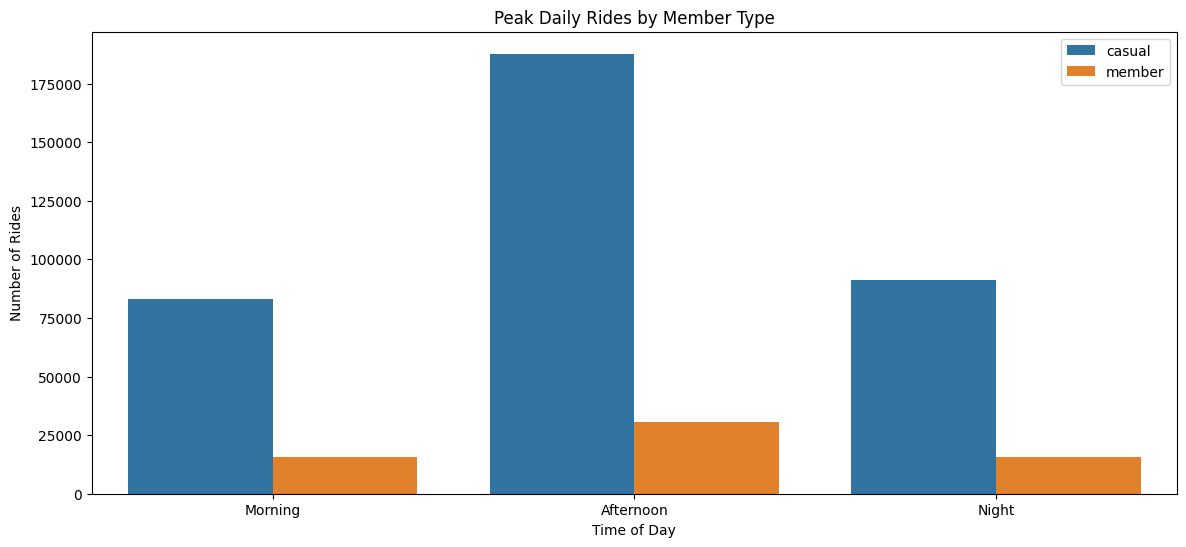

In [60]:
df_tod = df.groupby(['member_casual','time_of_day']).count()['ride_id'].reset_index()

day_order = ['Morning','Afternoon','Night']
# Plot
plt.figure(figsize = (14,6))
sns.barplot(data = df_tod, x = 'time_of_day', y = 'ride_id', hue = 'member_casual', order= day_order)

plt.title('Peak Daily Rides by Member Type')
plt.xlabel('Time of Day')
plt.ylabel('Number of Rides')

# Show legend
plt.legend()

print(df_tod)

#### Summary
Missing data and outliers tend to occur more frequently in the afternoon for both casual and member riders:

- Casual Riders: The highest number of outliers occurs in the afternoon, followed by night and then morning.
- Member Riders: Similarly, the highest number of outliers occurs in the afternoon, followed by morning and then night.

Observations
- Afternoon: Both casual and member riders have the most outliers in the afternoon, indicating that extended ride durations are more common during this time of day.
- Morning and Night: While casual riders experience more outliers at night compared to the morning, member riders have slightly more outliers in the morning compared to the night.

This suggests that the afternoon is a peak time for outliers in ride durations, likely due to riders taking longer trips during this period.

#### Are there specific times or seasons when outliers are more common?

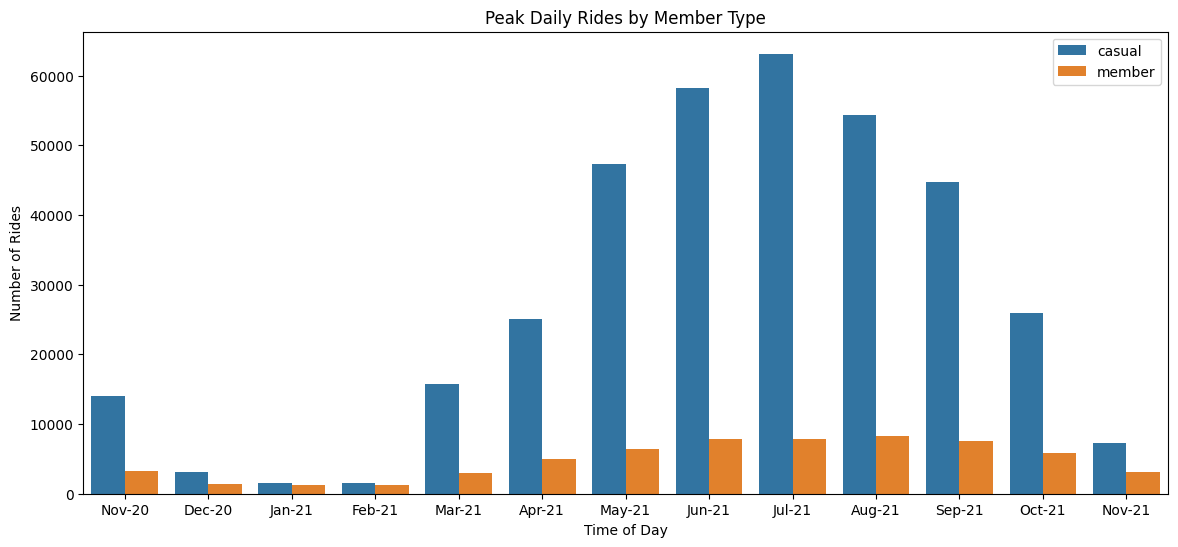

In [61]:
df_mod = df.groupby(['member_casual','month']).count()['ride_id'].reset_index()

month_order = ['Nov-20','Dec-20','Jan-21','Feb-21','Mar-21','Apr-21','May-21','Jun-21','Jul-21',
               'Aug-21','Sep-21','Oct-21','Nov-21']
# Plot
plt.figure(figsize = (14,6))
sns.barplot(data = df_mod, x = 'month', y = 'ride_id', hue = 'member_casual', order= month_order)


plt.title('Peak Daily Rides by Member Type')
plt.xlabel('Time of Day')
plt.ylabel('Number of Rides')

# Show legend
plt.legend()

## Station and Location Analysis
Which stations have the most missing data?

Outliers - Memeber Start Station

In [62]:
# Outlier Start stations and the location
print(f'The most used member station is: {df['start_station_name'].value_counts().reset_index()['start_station_name'][0]}')
print('The Top 10 member stations by ride count:')
df_m = df[df['member_casual'] == 'member'] 
df_m['start_station_name'].value_counts().sort_values(ascending=False).iloc[0:10]

The most used member station is: Streeter Dr & Grand Ave
The Top 10 member stations by ride count:


start_station_name
Streeter Dr & Grand Ave            996
Lakefront Trail & Bryn Mawr Ave    701
Theater on the Lake                646
Michigan Ave & Oak St              625
Wabash Ave & Grand Ave             546
Dearborn St & Erie St              537
Burnham Harbor                     519
Indiana Ave & Roosevelt Rd         494
Montrose Harbor                    476
Millennium Park                    410
Name: count, dtype: int64

Outlier - Member Destination Station

In [63]:
print(f'The most used member station is: {df['end_station_name'].value_counts().reset_index()['end_station_name'][0]}')
print('The Top 10 member stations by ride count:')
df_md = df[df['member_casual'] == 'member'] 
df_md['end_station_name'].value_counts().sort_values(ascending=False).iloc[0:10]

The most used member station is: Streeter Dr & Grand Ave
The Top 10 member stations by ride count:


end_station_name
Streeter Dr & Grand Ave            956
Theater on the Lake                812
Michigan Ave & Oak St              691
Lakefront Trail & Bryn Mawr Ave    686
Dearborn St & Erie St              652
Wabash Ave & Grand Ave             581
Burnham Harbor                     574
Montrose Harbor                    494
Shore Dr & 55th St                 475
Lake Shore Dr & Monroe St          472
Name: count, dtype: int64

Oultiers - Casual Start Station

In [64]:
# Outlier Start stations and the location
print(f'The most used member station is: {df['start_station_name'].value_counts().reset_index()['start_station_name'][0]}')
print('The Top 10 casual stations by ride count:')
df_c = df[df['member_casual'] == 'casual'] 
df_c['start_station_name'].value_counts().sort_values(ascending=False).iloc[0:10]

The most used member station is: Streeter Dr & Grand Ave
The Top 10 casual stations by ride count:


start_station_name
Streeter Dr & Grand Ave              17521
Millennium Park                      11499
Michigan Ave & Oak St                 8504
Lake Shore Dr & Monroe St             6758
Shedd Aquarium                        4946
Buckingham Fountain                   4368
Theater on the Lake                   4324
Michigan Ave & Washington St          4316
Indiana Ave & Roosevelt Rd            4292
DuSable Lake Shore Dr & Monroe St     4241
Name: count, dtype: int64

In [65]:
print(f'The most used member station is: {df['end_station_name'].value_counts().reset_index()['end_station_name'][0]}')
print('The Top 10 member stations by ride count:')
df_md = df[df['member_casual'] == 'casual'] 
df_md['end_station_name'].value_counts().sort_values(ascending=False).iloc[0:10]

The most used member station is: Streeter Dr & Grand Ave
The Top 10 member stations by ride count:


end_station_name
Streeter Dr & Grand Ave              19832
Millennium Park                      10815
Michigan Ave & Oak St                 9206
Lake Shore Dr & Monroe St             6751
Theater on the Lake                   5531
DuSable Lake Shore Dr & Monroe St     4422
Shedd Aquarium                        4412
Buckingham Fountain                   4261
Indiana Ave & Roosevelt Rd            4196
Michigan Ave & 8th St                 4080
Name: count, dtype: int64

## Summary and Conclusion
- Members Analysis: Outliers are characterized by significantly longer ride durations, especially for casual riders.
- Bike Type-Based Analysis: Electric bikes have a much higher rate of anomalies compared to classic and docked bikes. This might be due to more frequent technical issues associated with electric bikes.
- Weekends (Saturday and Sunday) show a higher incidence of anomalies for both casual riders and members, suggesting higher usage during peak days.
- Outliers are most frequent in the afternoon for both casual riders and members. This might be due to higher activity levels and potential system overloads during these times.
- Summer months (June, July, and August) and early fall (September and October) see a higher incidence of outliers for both casual riders and members. This pattern suggests seasonal peaks in usage which might lead to more data anomalies due to increased system load or seasonal events affecting ride behavior.